64.164551937


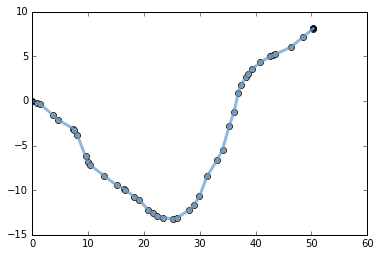

In [4]:
import numpy as np
import shapely.geometry as shg
import matplotlib.pyplot as pyplot
import copy as cp
import scipy.spatial.distance as scd


%matplotlib inline

COLOR = {
    True:  '#6699cc',
    False: '#ffcc33'
    }

def v_color(ob):
    return COLOR[ob.is_simple]

def plot_coords(ax, ob):
    for line in ob:
        x, y = line.xy
        ax.plot(x, y, 'o', color='#999999', zorder=1)

def plot_bounds(ax, ob):
    x, y = zip(*list((p.x, p.y) for p in ob.boundary))
    ax.plot(x, y, 'o', color='#000000', zorder=1)

def plot_lines(ax, ob):
    for line in ob:
        x, y = line.xy
        ax.plot(x, y, color=v_color(ob), alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

#no of interations
iterations = 200

max = 20
parent_id = 1
inter_pts = 7
prev_ang = 0
r = np.linspace(.99,.26,inter_pts)
max_exp = 2

min_dist = .1

#stack initial point

segments = []
segments_term = [np.array([0.,0])]

#store parent-child info in dictionary

parent_child = {}

tree = shg.MultiLineString(segments)

def branch(rot,r=1):
    start_pt = np.array([1., 0])
    R = r*np.array([
                    [ np.cos(rot*np.pi/180), -np.sin(rot*np.pi/180)],
                    [ np.sin(rot*np.pi/180), np.cos(rot*np.pi/180)]
                ])
    return np.dot(R,start_pt)


for k in np.arange(iterations):
    
    #add next segment
    x = np.max(3*np.random.random(),.4)
    ang = (np.random.random()*(-2*max)+max) + prev_ang
    new_segt = segments_term[parent_id-1], (segments_term[parent_id-1] + x*branch(ang))
    delayed_tree = shg.MultiLineString(segments[:-1])

    test_line = shg.LineString(new_segt)
    dist = delayed_tree.distance(test_line)
    
    if dist > min_dist or k < 2:
        prev_ang = ang
        segments.append( shg.LineString(cp.copy(new_segt)) )
        segments_term.append(new_segt[1])
        tree = shg.MultiLineString(segments)
        delayed_tree = shg.MultiLineString(segments[:-1])
        parent_id=parent_id+1
    else:
        counter = 0
        hammerTime = True
        while counter < 20 and hammerTime:
            x = np.max(3*np.random.random(),.4)
            ang = (np.random.random()*(-2*max)+max) + prev_ang
            new_segt = segments_term[parent_id-1], (segments_term[parent_id-1] + x*branch(ang))
            test_line = shg.LineString(new_segt)
            dist = delayed_tree.distance(test_line)
            if dist > min_dist:
                segments.append( shg.LineString(cp.copy(new_segt)) )
                segments_term.append(new_segt[1])
                #tree = shg.MultiLineString(segments)
                parent_id=parent_id+1
                hammerTime = False
            counter += 1
            

tree = shg.MultiLineString(segments)
print tree.length

fig = pyplot.figure(1, dpi=200)

ax = fig.add_subplot(111)
#plot_coords(ax, tree)
#plot_bounds(ax, tree)
plot_lines(ax, tree)
